## 타이타닉 데이터를 활용한 데이터 분석

## 1. 라이브러리 및 데이터
## Library & Data

In [51]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 불러오기
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 모델 불러오기

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### pd.read_csv()
 - csv파일 읽는 함수

In [53]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/타이타닉/train.csv')# 모델 학습 파일
test = pd.read_csv('/content/drive/MyDrive/타이타닉/test.csv')# 모델 시험지 파일
submission = pd.read_csv('/content/drive/MyDrive/타이타닉/sample_submission.csv')#답안지 파일 

## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)


### pd.DataFrame.head()
 - 데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [9]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

### pd.DataFrame.tail()
 - 데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [12]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### pd.DataFrame.shape
 - 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [15]:
train.shape

(891, 12)

In [18]:
print(test.shape)
print(submission.shape)

(418, 11)
(418, 2)


### pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?
 - type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="700">

In [20]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### pd.Series.value_counts()
 - series 내 고유값들 각각의 개수를 보여주는 함수
 - 가장 많이 나오는 고유값들 순서로 보여줍니다.
 - 비어 있는 값은 고려하지 않습니다.

In [24]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### pd.Series.unique()
- 해당 series의 고유값들만 보여주는 함수
- [1, 1, 1, 3] 이라는 시리즈가 있다면, unique() 함수 적용시 [1, 3]이 출력됩니다.
- nan 값이 있을시 nan값도 포함하여 출력한다 (Not a Number)
- 출현하는 순서대로 나오기 때문에, 알파벳 순서 또는 오름차순으로 정렬되어 있지 않습니다.

In [25]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### pd.DataFrame.groupby()
 - 집단에 대한 통계량 확인 
 
<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

In [27]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [28]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


### pd.Series.plot(kind = "bar")
- 막대 그래프
- index 값이 x축, value값이 y축으로 대응 됩니다. 
- value_counts()의 결과물을 보여줄 때 유용합니다. 
- groupby된 결과물을 보여줄 때 유용합니다. 

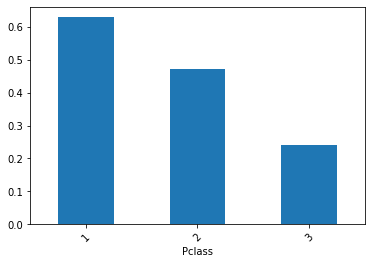

In [17]:
train.groupby('Pclass').mean()['Survived'].plot(kind = 'bar', rot = 45)

### pd.Series.plot(kind = 'hist')
- 히스토그램: 구간별로 속해있는 row의 개수를 시각화 합니다.
- 수치형에서만 가능, 범주는 안됩니다!

<img src="http://www.statisticslectures.com/images/continuoushistogram.gif" width="700" height="300">

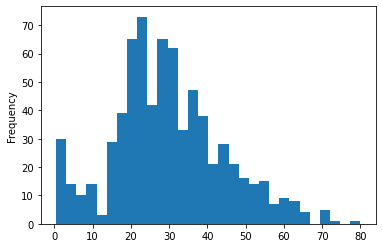

In [20]:
train['Age'].plot(kind = 'hist' , bins = 30)

- 보조선은 grid = True를 통해 추가 할 수 있습니다. 

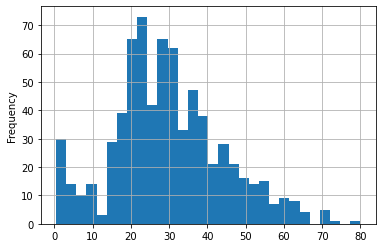

In [22]:
train['Age'].plot(kind = 'hist' , bins = 30 , grid = True)

### pd.DataFrame.plot(x, y, kind = 'scatter')
- 산점도: 두 변수간의 관계를 시각화

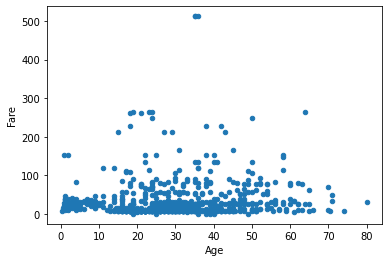

In [23]:
train.plot(x = 'Age' , y = 'Fare' , kind = 'scatter')

## 3. 데이터 전처리
## Data Cleansing & Pre-Processing  

### pd.Series.isna()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False

In [26]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.
- 범주형 변수일 경우, 최빈값으로 대체할 수 있습니다. 

train['Age'].median()

In [29]:
train['Age'] = train['Age'].fillna(28)

In [30]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
train['Embarked'] = train['Embarked'].fillna('s')

### pd.Series.map()
- 시리즈 내 값을 변환 할 때 사용하는 함수

In [64]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [66]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

In [68]:
x_train = train[['Sex', 'Pclass']]
y_train = train['Survived']

In [56]:
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

In [57]:
x_test = test[['Sex', 'Pclass']]

### sklearn.linear_model.LogisticRegression()
- 로지스틱 회귀 모형
- 0과 1사이의 값을 산출

In [60]:
lr = LogisticRegression()

### sklearn.tree.DecisionTreeClassifier()
- 의사결정 나무 모델

In [86]:
dt = DecisionTreeClassifier()

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

In [75]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### model.predict()
- 모델 예측

In [79]:
lr.predict(x_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### model.predict_proba()
- 모델 예측

In [91]:
lr_pred = lr.predict_proba(x_test)[:,1]

In [88]:
dt.predict_proba(x_test)

array([[0.86455331, 0.13544669],
       [0.5       , 0.5       ],
       [0.84259259, 0.15740741],
       [0.86455331, 0.13544669],
       [0.5       , 0.5       ],
       [0.86455331, 0.13544669],
       [0.5       , 0.5       ],
       [0.84259259, 0.15740741],
       [0.5       , 0.5       ],
       [0.86455331, 0.13544669],
       [0.86455331, 0.13544669],
       [0.63114754, 0.36885246],
       [0.03191489, 0.96808511],
       [0.84259259, 0.15740741],
       [0.03191489, 0.96808511],
       [0.07894737, 0.92105263],
       [0.84259259, 0.15740741],
       [0.86455331, 0.13544669],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.63114754, 0.36885246],
       [0.86455331, 0.13544669],
       [0.03191489, 0.96808511],
       [0.63114754, 0.36885246],
       [0.03191489, 0.96808511],
       [0.86455331, 0.13544669],
       [0.03191489, 0.96808511],
       [0.86455331, 0.13544669],
       [0.63114754, 0.36885246],
       [0.86455331, 0.13544669],
       [0.

In [94]:
dt_pred = dt.predict_proba(x_test)[:,1]

In [92]:
submission['Survived'] = lr_pred
submission

,PassengerId,Survived
0,892,0.102021
1,893,0.593544
2,894,0.224759
3,895,0.102021
4,896,0.593544
...,...,...
413,1305,0.102021
414,1306,0.904848
415,1307,0.102021
416,1308,0.102021


### pd.DataFrame.to_csv()
 - csv파일 저장하는 함수

In [93]:
submission.to_csv('logistic_regression_pred.csv', index = False)

In [97]:
submission['Survived'] = dt_pred
submission.to_csv('decision_tree_pred.csv', index = False)

## 6. 결과 및 결언
## Conclusion & Discussion